In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.3.0


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape((-1,28,28,1))
x_test = x_test.reshape((-1,28,28,1))
print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1)   (60000,)
(10000, 28, 28, 1)   (10000,)


In [3]:
x_shape  = x_train.shape
deep_model = keras.Sequential(
[
    layers.Conv2D(input_shape=((x_shape[1], x_shape[2], x_shape[3])),
                 filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
    
])

In [4]:
deep_model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy'])
deep_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

In [5]:
history = deep_model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 148s 176ms/step - loss: 0.2856 - accuracy: 0.9228 - val_loss: 0.0688 - val_accuracy: 0.9797
Epoch 2/5
844/844 [==============================] - 147s 174ms/step - loss: 0.0655 - accuracy: 0.9799 - val_loss: 0.0611 - val_accuracy: 0.9815
Epoch 3/5
844/844 [==============================] - 148s 175ms/step - loss: 0.0459 - accuracy: 0.9854 - val_loss: 0.0519 - val_accuracy: 0.9853
Epoch 4/5
844/844 [==============================] - 148s 176ms/step - loss: 0.0372 - accuracy: 0.9878 - val_loss: 0.0359 - val_accuracy: 0.9880
Epoch 5/5
844/844 [==============================] - 149s 176ms/step - loss: 0.0295 - accuracy: 0.9905 - val_loss: 0.0402 - val_accuracy: 0.9870


In [6]:
deep_model.evaluate(x_test, y_test)

313/313 [==============================] - 7s 23ms/step - loss: 0.0374 - accuracy: 0.9899


[0.037417929619550705, 0.9898999929428101]

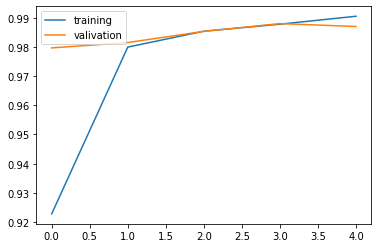

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()

In [8]:
result = deep_model.evaluate(x_test, y_test)

313/313 [==============================] - 7s 23ms/step - loss: 0.0374 - accuracy: 0.9899
